# Aviation-Accident-Project

# My company is expanding in to new industries to diversify its portfolio in which we are interested in purchasing and operating airplanes for commercial and private enterprises but we do not know anything about the potential risks of aircraft.Am charged with determining which aircraft are the lowest risk for the company to start this new business endeavour which then i must transfer my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.
 



In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading the Data


In [33]:
Accident_Dataframe = pd.read_csv('archive\AviationData.csv',encoding='latin-1', low_memory=False)
Accident_Dataframe.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Wrangling

Checking for missing values.


In [34]:
#checking for missing values using isnull()
Accident_Dataframe.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [35]:
Accident_Dataframe.shape

(88889, 31)

In [36]:
#Standardising column names
Accident_Dataframe.columns = Accident_Dataframe.columns.str.replace('.', '_').str.title()
Accident_Dataframe.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

# Dropping columns

In [37]:
#Dropping columns
Accident_Dataframe.drop(columns=['Longitude','Amateur_Built','Air_Carrier','Latitude','Airport_Code'], inplace=True)

In [38]:
Accident_Dataframe.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Name,Injury_Severity,Aircraft_Damage,Aircraft_Category,...,Schedule,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,NaN,...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,NaN,...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,NaN,...,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,NaN,...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,NaN,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [42]:
#Replace and NaN in make column with None
Accident_Dataframe['Make'] = Accident_Dataframe['Make'].fillna('None')

# Checking for duplicates

In [47]:
Accident_Dataframe.duplicated()#Checks.for.any.duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [48]:
Accident_Dataframe.duplicated().sum()

0

In [61]:
#Creating a new column for total passengers
# Set the figure size
plt.figure(figsize=(10, 6))

# Define the width of the bars
bar_width = 0.35

# Create an array with the positions of the bars on the x axis
r1 = np.arange(len(sorted_df['Make']))

# Create a bar plot for 'Uninjured Rate'
plt.bar(r1 - bar_width/2, sorted_df['Uninjured_Rate'], color='b', width=bar_width, label='Uninjured Rate')

# Create a bar plot for 'Fatal Injury Rate' next to the first one
plt.bar(r1 + bar_width/2, sorted_df['Fatal_Injury_Rate'], color='r', width=bar_width, label='Fatality Rate')

# Add a legend
plt.legend(loc='upper left')

# Set labels and title
plt.xlabel('Make')
plt.ylabel('Rate')
plt.title('Uninjured and Fatality Rate By Make')

# Set the position of the x ticks
plt.xticks(r1, sorted_df['Make'])

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [62]:
#Creating column for rate of fatal injuries per accident
Accident_Dataframe['Fatal_Injury_Rate'] = Accident_Dataframe['Total_Fatal_Injuries'] / Accident_Dataframe['Total_Passengers']
#Creating a new column for rate of an injured per accident
Accident_Dataframe['Uninjured_Rate'] =Accident_Dataframe['Total_Uninjured'] / Accident_Dataframe['Total_Passengers']
#Droping NaN in our new columns
mask = Accident_Dataframe[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Fatal_Injury_Rate', 'Uninjured_Rate']].isna().any(axis=1)
# Using the mask to filter out rows with NaNs
Accident_Dataframe = Accident_Dataframe[~mask]

In [66]:
#Create new dataframe of the top plane manufacturers
top_manufacturers = ['Boeing', 'Bombardier', 'Airbus', 'Cessna', 'Embraer', 'Dassault', 'Lockheed', 'Gulfstream']

# Uses the isin() function to filter the DataFrame
top_makes = Accident_Dataframe[Accident_Dataframe['Make'].isin(top_manufacturers)]

top_makes.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Name,Injury_Severity,Aircraft_Damage,Aircraft_Category,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injury_Rate,Uninjured Rate,Uninjured_Rate
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,Fatal(4),Destroyed,NaN,...,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,4.0,1.0,0.0,0.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,...,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,2.0,0.0,1.0,1.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,HANOVER,Non-Fatal,Substantial,Airplane,...,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,2.0,0.0,1.0,1.0
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,...,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1.0,1.0,0.0,0.0
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",United States,NaN,Fatal(3),Destroyed,Airplane,...,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983,3.0,1.0,0.0,0.0


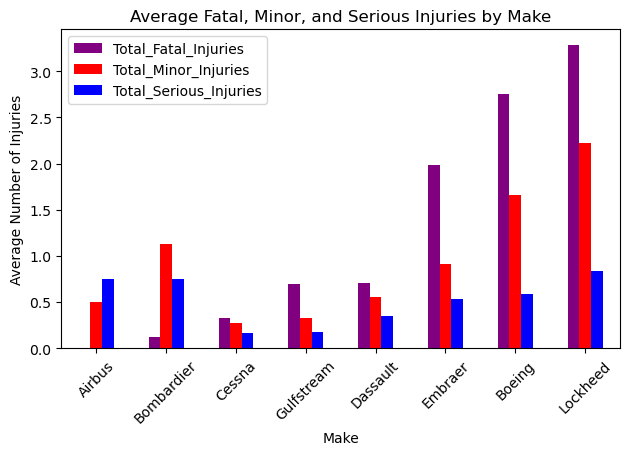

In [72]:
# Group and calculate mean
grouped_df = top_makes.groupby(['Make'])[['Total_Fatal_Injuries', 'Total_Minor_Injuries', 'Total_Serious_Injuries']].mean()

# Sort values
sorted_df = grouped_df.sort_values(by='Total_Fatal_Injuries', ascending=True)

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Create stacked bar plot
sorted_df.plot(kind='bar', ax=ax,color=['purple','red','blue'])

# Set title and labels
ax.set_title('Average Fatal, Minor, and Serious Injuries by Make')
ax.set_xlabel('Make')
ax.set_ylabel('Average Number of Injuries')

# Adjust layout
plt.tight_layout()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

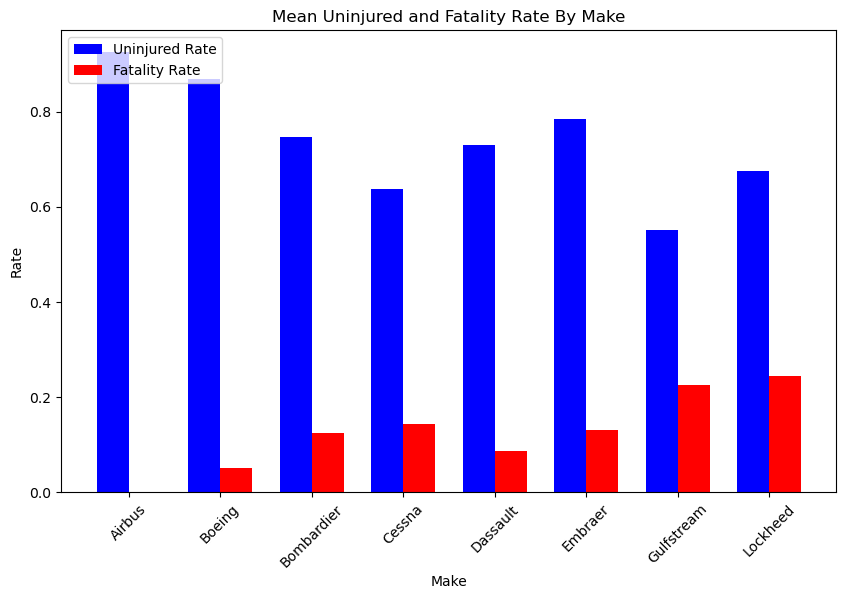

In [83]:
# Group by 'Make' and calculate mean 'Uninjured Rate' and 'Fatal Injury Rate'
grouped_df = top_makes.groupby('Make')[['Uninjured_Rate', 'Fatal_Injury_Rate']].mean().reset_index()

# Sets the figure size
plt.figure(figsize=(10, 6))

# Defines the width of the bars
bar_width = 0.35

# Create an array with the positions of the bars on the x axis
r1 = np.arange(len(grouped_df['Make']))

# Create a bar plot for 'Uninjured Rate'
plt.bar(r1 - bar_width/2, grouped_df['Uninjured_Rate'], color='b', width=bar_width, label='Uninjured Rate')

# Create a bar plot for 'Fatal Injury Rate' next to the first one
plt.bar(r1 + bar_width/2, grouped_df['Fatal_Injury_Rate'], color='r', width=bar_width, label='Fatality Rate')

# Add a legend
plt.legend(loc='upper left')

# Set labels and title
plt.xlabel('Make')
plt.ylabel('Rate')
plt.title('Mean Uninjured and Fatality Rate By Make')

# Set the position of the x ticks
plt.xticks(r1, grouped_df['Make'])

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

I am recommending the purchase of airbus planes for our commercial division.This is becauese in our dataset their hasnt be a fatal injure associated with an airbus accident.Compared to boeing the major competitor in the commercial jet space they have a lower share of total minor injuries.
Am also recommending the purchase of cessna jets for a private enterprise divison because cessna has the lowest 
A

[Text(0.5, 0, 'Model'),
 Text(0, 0.5, 'Uninjured Rate'),
 Text(0.5, 1.0, 'Uninjured Rate By Airbus Model')]

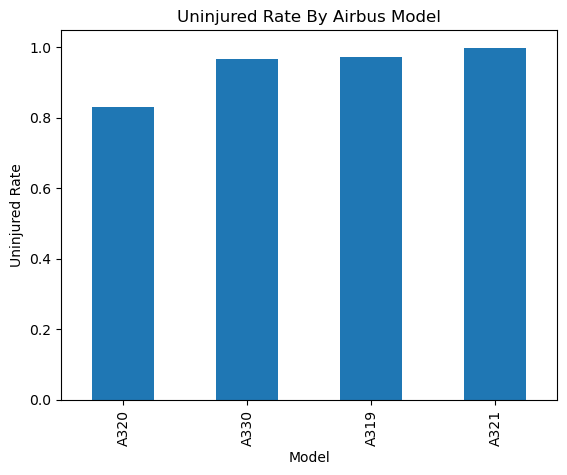

In [85]:
# Group by 'Model', calculate mean 'Uninjured_Rate', sort values and plot
ax = top_makes[top_makes['Make']=='Airbus'].groupby('Model')['Uninjured_Rate'].mean().sort_values().plot(kind='bar', stacked=True)

# Set labels and title
ax.set(xlabel='Model', ylabel='Uninjured Rate', title='Uninjured Rate By Airbus Model')

A321;for commercial division

[Text(0.5, 0, 'Model'),
 Text(0, 0.5, 'Uninjured Rate'),
 Text(0.5, 1.0, 'Uninjured Rate By Cessna Model')]

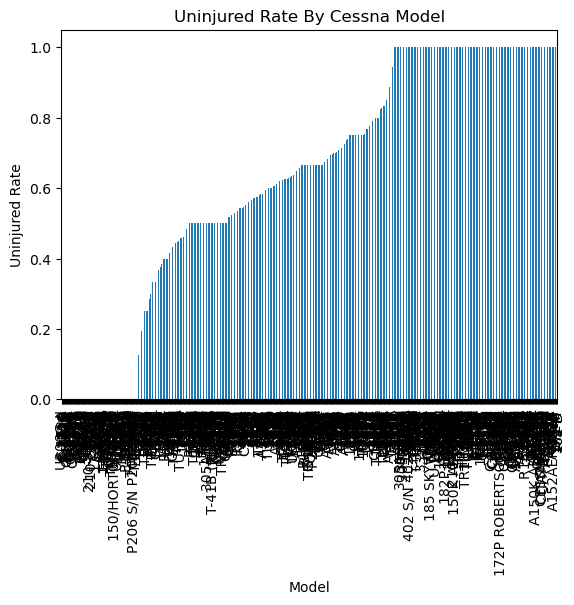

In [86]:
# Group by 'Model', calculate mean 'Uninjured_Rate', sort values and plot
ax = top_makes[top_makes['Make']=='Cessna'].groupby('Model')['Uninjured_Rate'].mean().sort_values().plot(kind='bar', stacked=True)

# Set labels and title
ax.set(xlabel='Model', ylabel='Uninjured Rate', title='Uninjured Rate By Cessna Model')